# Atomic Mass Evaluation 2016 Data Processing

Let us first import our parsing utilities.

In [4]:
import sys
# sys.path.append("..")
sys.path.append(r"C:\Users\Pedro\Desktop\ML_Nuclear_Data")

In [5]:
import nucml.ame.parsing_utilities as ame

# For prototype, ignore.
import importlib
importlib.reload(ame)
print("Libraries reloaded.")

Libraries reloaded.


# Loading the AME Data

In [8]:
import nucml.datasets as nuc_data

In [9]:
ame2016 = nuc_data.load_ame(nan=False)

In [10]:
ame2016.head()

,N,Z,A,EL,O,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,...,"Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)",Neutrons,Mass_Number,Flag
0,1,0,1,n,Other,8071.31713,0.00046,0.000,0.0,782.347,...,-6183.753392,-6053.839883,6257.229000,-1395.611905,763.755,20577.619400,12924.778595,1,1,I
1,0,1,1,H,Other,7288.97061,0.00009,0.000,0.0,18244.328,...,3128.616100,-6053.839883,5160.255667,5493.474400,18225.736,19480.646067,19813.864900,0,1,I
2,1,1,2,H,Other,13135.72176,0.00011,1112.283,0.0,18244.328,...,6257.231100,-6053.839883,4032.659000,3268.904400,18225.736,18353.049400,17589.294900,1,2,I
3,2,1,3,H,Other,14949.80993,0.00022,2827.265,0.0,18.592,...,0.001100,-6053.839883,-0.001000,4381.189400,0.000,14320.389400,18701.579900,2,3,I
4,1,2,3,He,Other,14931.21793,0.00021,2572.680,0.0,-13736.000,...,763.751100,0.000400,3081.044714,0.004400,-13754.592,17401.435114,14320.394900,1,3,I


# ---------------- Tutorial - Creating the AME files from Scratch ---------------- 

### This notebook explains what each of the AME_parsing_utilities.py functions do and how to use it in both a notebook environment and the command line if preferred. 

When using the code, it assumes the following directory exists by default, which is true if downloaded from github.

###  We can re-create the proccesed AME files using the `.get_all()` function.

In [6]:
# Set up the path to the AME directory
# This is the default directory from this notebook's location
ame_dir = "../AME"

In [7]:
ame.get_all(ame_dir, fillna=True, add_qvalues=True, mode="isotopic")

MASS16: Reading ../AME/For_Extraction/mass16_toparse.txt...
MASS16: Formatting file...
MASS16: Replacing NaNs with np.nan...
MASS16: Dropping unnecessary data...
MASS16: Saving to ../AME/AME_atomic_masses_v1.csv...
MASS16: Finished.
RCT1: Reading ../AME/For_Extraction/rct1_16_toparse.txt...
RCT1: Formatting file...
RCT1: Replacing NaNs with np.nan...
RCT1: Dropping unnecessary data...
RCT1: Saving to ../AME/AME_atomic_masses_v1_rct1.csv...
RCT1: Finished.
RCT2: Reading ../AME/For_Extraction/rct2_16_toparse.txt...
RCT2: Formatting file...
RCT2: Replacing NaNs with np.nan...
RCT2: Dropping unnecessary data...
RCT2: Saving to ../AME/AME_atomic_masses_v1_rct2.csv...
RCT2: Finished.
Reading mass16, rct1, and rct2 CSV files...
Calculating additional reaction energies...
Saving to CSV...
Saving to ../AME/AME_atomic_masses_v2.csv...
Finished merging CSV files.
Reading ../AME/AME_atomic_masses_v2.csv...
Reading ../AME/For_Extraction/periodic_table.csv...
Fromating dataframes...
Saving natural e

# The mass16, rct1_16, and rct2_16 files.

These original files can be downloaded from http://amdc.impcas.ac.cn/masstables/Ame2016/filel.html. The GitHub repository for NucML already contains the preprocessed files however you are welcome to download them again. The header just needs to be removed for each file. Lets take a look at the first 10 lines of the original and pre-processed files:

In [36]:
with open(ame_dir + "/For_Extraction/Originals/mass16.txt") as myfile:
    head = [next(myfile) for x in range(10)]
print(head)

['1    a0boogfu                                 A T O M I C   M A S S   A D J U S T M E N T\n', '0                                                     DATE  1 Mar 2017 TIME 17:26\n', '0        *********************                               A=   0 TO 295\n', '         * file : mass16.txt *\n', '         *********************\n', '\n', '   This is one file out of a series of 3 files published in:\n', '       "The Ame2016 atomic mass evaluation (I)"   by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu\n', '           Chinese Physics C41 030002, March 2017.\n', '       "The Ame2016 atomic mass evaluation (II)"  by M.Wang, G.Audi, F.G.Kondev, W.J.Huang, S.Naimi and X.Xu\n']


The header information is not needed for parsing the files and it was therefore removed. 

In [35]:
with open(ame_dir + "/For_Extraction/mass16_toparse.txt") as myfile:
    head = [next(myfile) for x in range(10)]
print(head)

['0  1    1    0    1  n         8071.31713    0.00046      0.0      0.0   B-    782.347    0.000   1 008664.91582    0.00049\n', '  -1    0    1    1 H          7288.97061    0.00009      0.0      0.0   B-      ?                1 007825.03224    0.00009\n', '0  0    1    1    2 H         13135.72176    0.00011   1112.283    0.000 B-      ?                2 014101.77811    0.00012\n', '0  1    2    1    3 H         14949.80993    0.00022   2827.265    0.000 B-     18.592    0.000   3 016049.28199    0.00023\n', '  -1    1    2    3 He        14931.21793    0.00021   2572.680    0.000 B- -13736.    2000.      3 016029.32265    0.00022\n', '  -3    0    3    3 Li  -pp   28667.      2000.       -2267.     667.    B-      ?                3 030775.      2147.\n', '0  2    3    1    4 H    -n   24621.127    100.000     1720.449   25.000 B-  22196.211  100.000   4 026431.868    107.354\n', '   0    2    2    4 He         2424.91561    0.00006   7073.915    0.000 B- -22898.273  212.132   4 00

### 1. Reading and Formating the MASS16 File

In [5]:
# Reading and formatting mass16 file
ame.read_mass16(ame_dir)

MASS16: Reading ../AME/For_Extraction/mass16_toparse.txt...
MASS16: Formatting file...
MASS16: Replacing NaNs with np.nan...
MASS16: Dropping unnecessary data...
MASS16: Saving to ../AME/AME_atomic_masses_v1.csv...
MASS16: Finished.


# Reading and Formating RCT1 and RCT2 files

In [63]:
ame.read_rct1(ame_dir)
ame.read_rct2(ame_dir)

RCT1: Reading ../AME/For_Extraction/rct1_16_toparse.txt...
RCT1: Formatting file...
RCT1: Replacing NaNs with np.nan...
RCT1: Dropping unnecessary data...
RCT1: Saving to ../AME/AME_atomic_masses_v1_rct1.csv...
RCT1: Finished.
RCT2: Reading ../AME/For_Extraction/rct2_16_toparse.txt...
RCT2: Formatting file...
RCT2: Replacing NaNs with np.nan...
RCT2: Dropping unnecessary data...
RCT2: Saving to ../AME/AME_atomic_masses_v1_rct2.csv...
RCT2: Finished.


# Merging All Three AMEs datafiles and Adding Q values

In [64]:
ame.merge_mass_rct(ame_dir, add_qvalues=True)

Reading mass16, rct1, and rct2 CSV files...
Calculating additional reaction energies...
Saving to CSV...
Saving to ../AME/AME_atomic_masses_v2.csv...
Finished merging CSV files.


# Using Periodic Table to Create Natural Elements Data

In [65]:
ame.create_natural_element_data(ame_dir, fillna=True)

Reading ../AME/AME_atomic_masses_v2.csv...
Reading ../AME/For_Extraction/periodic_table.csv...
Fromating dataframes...
Saving natural element information...
Flaggint natural and isotopic rows...
Saving final CSV file to ../AME/AME_Isotopic_Properties_w_NaN.csv...
Filling missing values using isotopic mode.
Saving imputed final CSV file to ../AME/AME_Isotopic_Properties_no_NaN.csv...
Finished.


# Visualizing AME Data

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 50)

In [6]:
image_dir = "../Figures/"

In [7]:
df_final = pd.read_csv(ame_dir + "/AME_final_properties_no_NaN.csv")

In [71]:
df_final.head()

,N,Z,A,EL,O,Mass_Excess,dMass_Excess,Binding_Energy,dBinding_Energy,B_Decay_Energy,dB_Decay_Energy,Atomic_Mass_Micro,dAtomic_Mass_Micro,S(2n),dS(2n),S(2p),dS(2p),Q(a),dQ(a),Q(2B-),dQ(2B-),Q(ep),dQ(ep),Q(B-n),dQ(B-n),...,"Q(g,He3)","Q(g,2p)","Q(g,2n)","Q(g,a)","Q(p,n)","Q(p,2p)","Q(p,pn)","Q(p,d)","Q(p,2n)","Q(p,t)","Q(p,3He)","Q(n,2p)","Q(n,np)","Q(n,d)","Q(n,2n)","Q(n,t)","Q(n,3He)","Q(d,t)","Q(d,3He)","Q(3He,t)","Q(3He,a)","Q(t,a)",Neutrons,Mass_Number,Flag
0,1,0,1,n,Other,8071.31713,0.00046,0.000,0.0,782.347,0.0,1.008665e+06,0.00049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0005,NaN,-0.00,2224.566,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,6257.229,NaN,763.755,20577.6194,NaN,1,1,I
1,0,1,1,H,Other,7288.97061,0.00009,0.000,0.0,NaN,NaN,1.007825e+06,0.00009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.00,2224.566,NaN,NaN,NaN,NaN,5493.4744,NaN,NaN,19813.8649,0,1,I
2,1,1,2,H,Other,13135.72176,0.00011,1112.283,0.0,NaN,NaN,2.014102e+06,0.00012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2224.57,-2224.57,-0.004,NaN,NaN,5493.4765,NaN,-2224.57,-0.004,-2224.57,6257.2311,NaN,4032.659,3268.9044,NaN,18353.0494,17589.2949,1,2,I
3,2,1,3,H,Other,14949.80993,0.00022,2827.265,0.0,18.592,0.0,3.016049e+06,0.00023,8481.79,0.0,NaN,NaN,NaN,NaN,-13717.0,2000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,-8481.79,NaN,-763.7545,NaN,-6257.23,-4032.664,NaN,0.0049,-763.7535,NaN,NaN,NaN,-6257.23,0.0011,NaN,-0.001,NaN,0.000,14320.3894,NaN,2,3,I
4,1,2,3,He,Other,14931.21793,0.00021,2572.680,0.0,-13736.000,2000.0,3.016029e+06,0.00022,NaN,NaN,7718.04,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0006,-7718.04,NaN,NaN,-14518.3465,-5493.47,NaN,NaN,NaN,NaN,-0.0035,NaN,-5493.47,-3268.904,NaN,763.7511,0.0004,NaN,0.0044,-13754.592,NaN,14320.3949,1,3,I


In [72]:
from mpl_toolkits.mplot3d import Axes3D

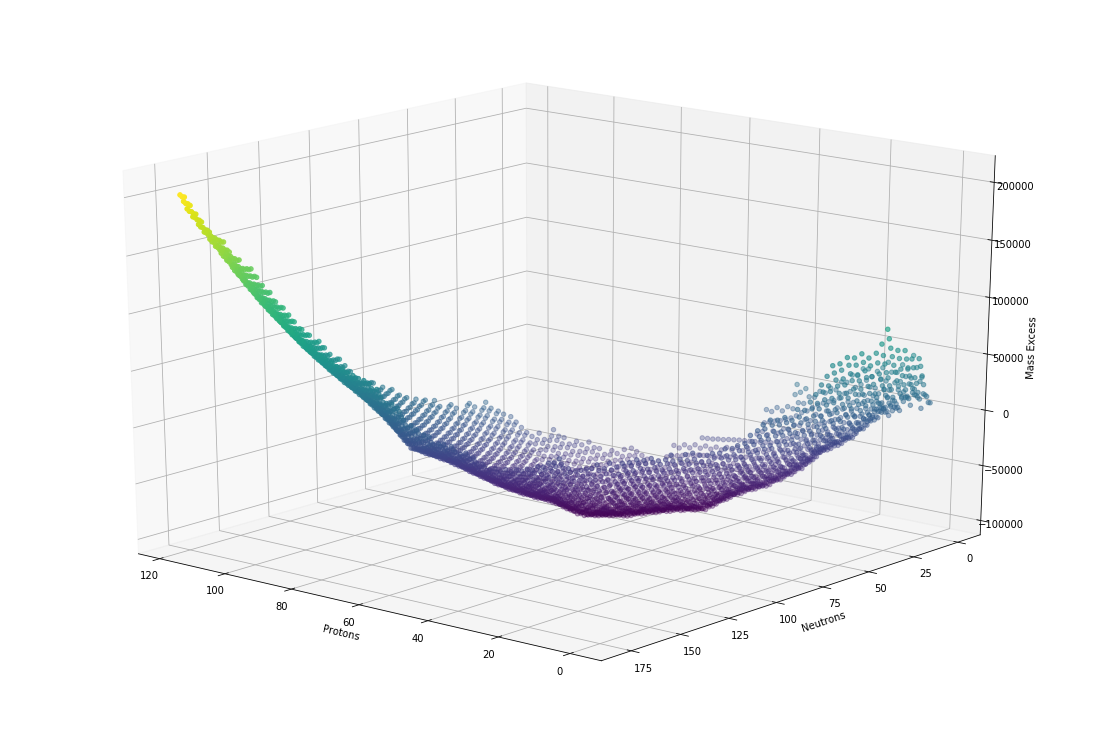

In [73]:
# ax = plt.axes(projection='3d')
fig = plt.figure(figsize=(15,10))
ax = ax = Axes3D(fig)

# Data for three-dimensional scattered points
zdata = df_final.Mass_Excess
xdata = df_final.Z
ydata = df_final.N
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis');
ax.set_zlabel("Mass Excess")
ax.set_xlabel("Protons")
ax.set_ylabel("Neutrons")
ax.view_init(20, 130)
plt.savefig(image_dir + "mass_excess_per_ZN.png", dpi=500)

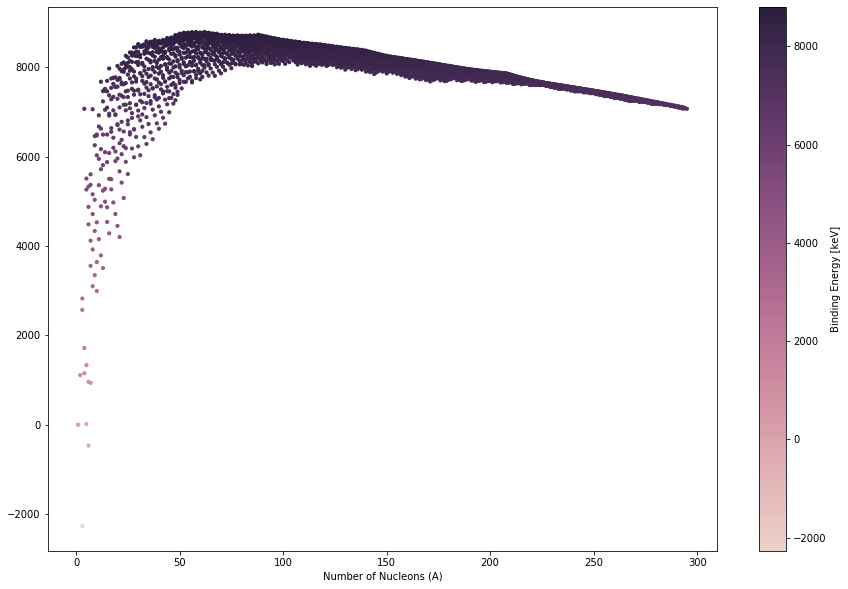

In [98]:
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(15,10))
points = ax.scatter(df_final.A, df_final.Binding_Energy, c=df_final.Binding_Energy, s=10, cmap=cmap)
f.colorbar(points).set_label("Binding Energy [keV]")
ax.set_xlabel("Number of Nucleons (A)")
plt.savefig(image_dir + "binding_energy_per_A.png", dpi=500)